# Neural Network 정의
Hoya F/W 은 기본적으로 실시간으로 지속적인 데이터 수집, 모델 최신화를 통한 서비스 제공을 Concept으로 하고 있으며, 이를 위해서 기본적으로 만들고자하는 AI 의 속성을 정의하는 작업이 필요하다. Hoya 에서 AI 모델에 대한 관리는 크게 3가지 Step 으로 나누어 진행이 된다. <br>
<b>STEP1 : </b> AI 모델의 비지니스적인 용도를 정의하는 작업이다. (Example : 이메일의 Spam 여부를 판단하는 모델정의와 같은 형태) <br>
<b>STEP2 : </b> Step 1 에서 정의한 모델에 대한 버전을 관리한다. 버전에서는 어떤식으로 데이터를 수집하고 분석을 할 것인지를 정의하는데, 
동일한 비지니스 목적을 가지고 있는 AI 모델이라고 할지라도 다양한 방법으로 목적을 달성할 수 있기 때문에 그 방법에 따라 다른 버전을 가지고 관리하게 되는것이다. 이렇게 정의된 버전은 가장 잘 동작하는 버전을 선택하여 Active Flag 를 지정할 수 있는데, Active 한 버전은 실제 Predict 서비스를 요청하였을 때, 동작하게 된다. <br>
<b>STEP3 : </b> Step 2 에서 정의된 버전은 또 다시 Batch Version 으로 관리가 되는데, 이는 어떤 데이터를 가지고 훈련을 하였느냐에 따라 AI 모델의 정확도가 달라지기 때문이다. Batch Version 또한 Active Flag 을 가지게 되는데, Active Version 은 자동적인 평가로직을 통해서 예전 버전보다 정확도가 좋은 경우 자동적으로 변경되거나 유저가 수동으로 변경할 수 있도록 한다.  <br><br><br>
<b>[그림1] 아래는 위에 설명한 3개 Step 을 설명하는 도표 <b> <br>
<img src="../images/NeuralNet_Management.jpg">

# REST API 란? 
Hoyai 는 가지고 있는 기능의 99%가 REST API로 연동이 가능한 형태로 초기부터 설계/구축되어 모바일, Legacy 서버 등.. 어디에서도 모든 기능을 완벽하게 연동하여 사용할 수 있다. 이러한 특징은 User 측의 서버에서 원하는 시점에 데이터를 보내고, 모델을 훈련시키고, Active Version 을 바꾸는 등 모든 행위를 수행할 수 있다라는 측면에서 대단한 확장성을 갖는다고 볼 수 있다. 현재 UI 서비스가 구성되지 않은 상황임에도 제공되는 API 를 규격에 맞추어 Java 에서든, Python 에서는 서버에서든 Local 에서는 실행하여 준다면 언제든지 Hoyai 서버와 연동하여 개발을 진행 할 수 있다. 
Local 에서 테스트 목적으로 연동 및 Biz Pilot 시스템 개발에도 동일한 형태로 수행이 가능할 것이다. 

<b>[그림2] REST API 란? <b> <br>
<img src="../images/sematime-bulksms-rest-api.png">

# Hoyai REST API 
향후에는 User Security 및 권한등에 대한 보안 처리가 이루어져야 하지만, 현재 기준에서는 아무런 제약없이 서버에 접근이 가능한 상태이다. 
아래는 Step 1의 비지니스 Level 에서 AI 모델을 정의하는 API 인데, 아래와 같은 파라메터를 갖는다. <br>
REST API 라 함은 기본적으로 Key/Value 형태의 Url 설계를 기본으로 한다. 예를들면 아래와 같다. <br>
<b>예) /api/v1/type/common/target/nninfo/ </b><br>
○ api = v1 <br>
○ type = common <br>
○ target = nninfo  <br>  
해석을 해보면 다음과 같다. 위의 예제의 Request 는 API v1 을 요청하고 있으며, 전체 서비스중에서 common (공통) 기능을 호출하고 있는데, 상세하게는 nninfo (신경망 정보)를 관리하는 기능을 사용하고 싶다라는 의미가 된다. <br>
모든 REST API 는 명사형으로 정의가 되어야 하며, 동작에 대해서는 크게 4가지의 호출 Type 을 갖고 있다. post, get, put, delete 이다. <br>
○ post : insert 작업 <br>
○ get : find 작업 <br>
○ put : update 작업 <br>
○ delete : 삭제 작업 <br>
그러면 최종적으로 명사 + 동사로 조합을 해서 예를 들어보겠다. <br>
<b>resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/')</b> <br>
=> hoyai API version 1 에서 제공하는 기능중에 공통 기능의 한 부류인 네트워크 등록 기능에 대해서 insert 하는 작업을 수행하겠다. <br> 
<b>resp = requests.get('http://' + url + '/api/v1/type/common/target/nninfo/')</b> <br>
=> hoyai API version 1 에서 제공하는 기능중에 공통 기능의 한 부류인 네트워크 등록 기능에 대해서 조회하는 작업을 수행하겠다. <br> 

hoyai 의 모든 기능은 위와 같은 API 로 99% 접근 가능하게 설계되어 있으며, jupyter guide 를 통해서 설명 방법을 하나씩 설명할 예정이다. <br>
JAVA 의 경우 wrapping Client 공통 Class 를 개발예정에 있으며, 다른 시스템의 경우 REST 규격을 참조하여 얼마든지 연동이 가능하다. <br>

# STEP0 : URL 설정
처음에 서버를 설정하기 위해 한번 URL설정을 한다
nginx 버전인 경우 8989 django버전일 경우 8000을 설정한다

In [24]:
import requests
import json, os
import platform

url = "{0}:{1}".format(os.environ['HOSTNAME'] , "8000")
print(url)
nnid = 'nn00044'
ver = '1'

1d3f676b65ee:8000


# STEP1 : 기 등록된 AI Model 확인 
기존의 등록된 AI 모델들을 확인할 필요가 있다. 중복되는 ID 를 허용하지 않고, ID 자체를 사용자가 입력하도록 되어 있기 때문에 중독되지 않는 Key를 확인하여 사용할 필요가 있다. 조회시 Return 되는 데이터는 List-Dict Format 이기 때문에 보기 편한 형태로 얼마든지 가공하여 사용이 가능하다. 아래의 예를 보면 모든 데이터를 출력할 경우 너무 복잡하여 식별이 어렵기 때문에 ID 값만 출력하도록 하겠다.  

In [25]:
import requests
import json, os
import platform

url = "{0}:{1}".format(os.environ['HOSTNAME'] , "8000")
print(url)
resp = requests.get('http://' + url + '/api/v1/type/common/target/nninfo/nnid/all/' )
data = json.loads(resp.json())
return_list = []
for row in data :
    return_list.append(row['nn_id'])
print (return_list)

1d3f676b65ee:8000
['nn00000', 'nn00001', 'nn00002', 'nn00003', 'nn00004', 'nn00005', 'nn00006', 'nn00007', 'nn00008', 'nn00009', 'nn00010', 'nn00011', 'nn00012', 'nn00013', 'nn00014', 'nn00015', 'nn00016', 'nn00017', 'nn00018', 'nn00019', 'nn00021', 'nn00030', 'nn00040', 'nn00041', 'nn00042', 'nn00031', 'nn00032', 'logiccase3levelone100', 'logiccase3levelone100jh', 'logiccase3levelone100jh2', 'logiccase3levelone100jh3', 'logiccase3levelone100jh4', 'wcnntest24', 'nn00043']


# STEP1 : 비지니스 Level 의 AI 모델 정의
첫 번째 Step 은 위에서 설명한 것과 같이 비지니스의 종류를 정의하는 작업이다. 아래와 같이 파라메터를 json 형태로 정의하여 post 로 REST API 를 호출하면 중복되는 ID 가 아닌 경우 요청한 내용이 신규로 추가된다. 

nn_id : Neural Network ID<br>
biz_cate : Business 대분류<br>
biz_sub_cate : Business 소분류<br>
nn_title : Neural Network Title<br>
nn_desc : Neural Network Description<br>
use_flag : 사용여부<br> 
dir : 문제유형<br>
config : Custom 여부 

In [26]:
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/'+nnid+'/',
                     json={
                         "nn_id": "nn00043",
                         "biz_cate": "SCM",
                         "biz_sub_cate": "C80",
                         "nn_title" : "test",
                         "nn_desc": "이걸보고 찾아가세요",
                         "use_flag" : "Y",
                         "dir": "purpose",
                         "config": "N"
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : nn00044


# STEP1 : 등록된 Model 확인 
우리가 생성한 신규 Network ID 를 지정하여 조회하고자 할 경우 아래와 같이 ID를 지정하여 REST API 를 호출하면 된다. <br>
<b>/api/v1/type/common/target/nninfo/nnid/nn00016/</b> 

In [27]:
from IPython.display import display,HTML
import pandas as pd 



resp = requests.get('http://' + url + '/api/v1/type/common/target/nninfo/nnid/'+nnid)
data = json.loads(resp.json())
df = pd.read_json(resp.json())
HTML(df.to_html())

,active_flag,automl_parms,automl_runtime,automl_stat,biz_cate,biz_sub_cate,condition,config,created_by,creation_date,dir,eval_flag,id,job_end_time,last_update_date,last_updated_by,model_acc,nn_batch_ver_id,nn_batch_ver_info,nn_def_list_info_nn_id,nn_desc,nn_id,nn_id_id,nn_title,nn_ver_wflist_info_nn_ver,nn_wf_ver_id,nn_wf_ver_id_id,nn_wf_ver_info,train_flag,train_progress,use_flag
0,NaN,{},{},{},SCM,C80,NaN,N,NaN,NaN,purpose,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,이걸보고 찾아가세요,nn00044,NaN,test,NaN,NaN,NaN,NaN,NaN,NaN,Y


# STEP2 : Graph Version 등록
버전의 경우 POST 호출시 자동으로 Index 가 증가하여 생성되며, 별도의 version 지정등의 행위는 필요하지 않지만, 중요한 행위는 Active Version 을 지정하는 것으로써, 지정된 버전을 기준으로 모든 기능이 동작한다는 점에서 매우 중요하다. 

In [28]:


resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/'+nnid+'/version/',
                     json={
                         "nn_def_list_info_nn_id": "",
                         "nn_wf_ver_info": "test version info",
                         "condition": "1",
                         "active_flag": "Y"
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : nn00044


# STEP3 : Simple WorkFlow WDNN 등록

WDNN을 사용하기 위한 신규 WorkFlow 등록
    [Data_node] -> [Data_conf] -> [Feed_WDNN] -> [WDNN_CONF] -> [EVAL_DATA] -> [EVAL]

In [29]:

resp = requests.post('http://' + url + '/api/v1/type/wf/target/init/mode/simple/'+nnid+'/wfver/1/',
                     json={
                         "type": "frame"
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : frame


# STEP4 : Data Node 등록

Data Node를 설정한다
Data Node는 Data Type(CSV, Hadoop, S3등)을 설정하고, 트레이닝 할때 Threading & Queue를 통하여 처리할지를 결정하는
Multi_node_flag, 트레이닝 할 파일의 위치를 결정한다.

In [30]:


resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nnid+'/ver/'+ver+'/node/data_node/',
                     json={
                         "type": "csv",
                         "source_server": "local",
                         "source_sql": "all",
                         "source_path": "test",
                         "multi_node_flag": True
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))
#
#update preprocess
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/pre/nnid/'+nnid+'/ver/'+ver+'/node/data_node/',
                      json={
                          "preprocess":  "null",
                      })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))
#
 # update store_path
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/store/nnid/'+nnid+'/ver/'+ver+'/node/data_node/',
                      json={
                          "store_path": "test"
                      })

evaluation result : {'source_parse_type': 'raw', 'source_sql': 'all', 'type': 'csv', 'source_server': 'local', 'multi_node_flag': True, 'source_type': 'local', 'source_path': '/hoya_src_root/nn00044/1/data_node', 'max_sentence_len': 0, 'drop_duplicate': False, 'predict_path': '/hoya_src_root/nn00044/1/predict'}
evaluation result : null


# STEP5 : Data Conf 등록

Data conf를 설정한다. DataConf는 WDNN을 실행시키기 위한 기본 설정파일이다.
Label : 예측 필드 설정
extend_cell_Feature : 추가 사용자 설정
Cross_cell : 두개 이상의 컬럼을 합치는 설정
Transformation : 연속형 데이터를 범주형으로 바꾸는 설정


In [31]:


resp = requests.put('http://' + url + '/api/v1/type/wf/state/dataconf/detail/frame/nnid/'+nnid+'/ver/'+ver+'/node/dataconf_node/',
                     json={"label": "SUCCESSFUL_BID_PRICE"
                            , "Transformations":{}
                            , "cross_cell":{}
                            , "cell_feature":{}
                            , "extend_cell_feature" :{}
                           ,"label_values" : []
                           ,"label_type" : "CONTINUOUS"
                           })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))
#

evaluation result : {'extend_cell_feature': {}, 'cell_feature': {}, 'label_type': 'CONTINUOUS', 'Transformations': {}, 'label_values': [], 'label': 'SUCCESSFUL_BID_PRICE', 'cross_cell': {}}


# STEP5.1 : Data Conf Info


In [32]:

resp = requests.get('http://' + url + '/api/v1/type/wf/state/dataconf/detail/frame/nnid/'+nnid+'/ver/'+ver+'/node/dataconf_node/')
data = json.loads(resp.json())


#nn00031_1_dataconf_node


print("evaluation result : {0}".format(data))

evaluation result : {'extend_cell_feature': {}, 'cell_feature': {}, 'label_type': 'CONTINUOUS', 'cell_feature_unique': [], 'Transformations': {}, 'label_values': [], 'label': 'SUCCESSFUL_BID_PRICE', 'cross_cell': {}}


# STEP6 : Network Conf 등록

Network conf를 설정한다. Network conf는 Network node에 대한 configuration을 지정한다. 

● model_path : 
● hidden_layters : 입력과 출력사이의 훈련할 네트워크 층 갯수  
● batch_size : 한번에 훈련할 데이터 건수 
● epoch : 데이터를 몇번 훈련할 횟수 
● model_type : 네트워크 모델

In [33]:


resp = requests.post('http://' + url + '/api/v1/type/wf/state/netconf/detail/wdnn/nnid/'+nnid+'/ver/'+ver+'/node/netconf_node/',
                    json={
                        "model_path": "test",
                        "hidden_layers": [100],
                        "activation_function": "Relu",
                        "batch_size" : 12000,
                        "epoch" : 400,
                        "model_type" : "regression",
                        "train" : True
                    })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'model_path': 'test', 'activation_function': 'Relu', 'batch_size': 12000, 'train': True, 'model_type': 'regression', 'epoch': 400, 'hidden_layers': [100]}


# STEP7 : Eval Data  등록

Network conf를 설정한다. Network conf는 Network node에 대한 configuration을 지정한다. 

● model_path : 
● hidden_layters : 입력과 출력사이의 훈련할 네트워크 층 갯수  
● batch_size : 한번에 훈련할 데이터 건수 
● epoch : 데이터를 몇번 훈련할 횟수 
● model_type : 네트워크 모델

In [34]:

resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nnid+'/ver/'+ver+'/node/evaldata/',
                     json={
                         "type": "csv",
                         "source_server": "local",
                         "source_sql": "all",
                         "source_path": "test",
                         "multi_node_flag": False
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))
#
#update preprocess
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/pre/nnid/'+nnid+'/ver/'+ver+'/node/evaldata/',
                      json={
                          "preprocess":  "null",
                      })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))
#
 # update store_path
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/store/nnid/'+nnid+'/ver/'+ver+'/node/evaldata/',
                      json={
                          "store_path": "test"
                      })


evaluation result : {'source_parse_type': 'raw', 'source_sql': 'all', 'type': 'csv', 'source_server': 'local', 'multi_node_flag': False, 'source_type': 'local', 'source_path': '/hoya_src_root/nn00044/1/evaldata', 'max_sentence_len': 0, 'drop_duplicate': False, 'predict_path': '/hoya_src_root/nn00044/1/predict'}
evaluation result : null


# STEP8 : Eval Node Config
Eval Node를 설정한다.

In [35]:

resp = requests.put('http://' + url + '/api/v1/type/wf/state/eval/nnid/'+nnid+'/ver/'+ver+'/node/eval_node/',
                   json={
                        "type":"regression",
                    })
data = json.loads(resp.json())
print("evaluation node results : {0}".format(data))


evaluation node results : {'type': 'regression'}


# STEP9 : Data Train

데이터 입력한 다음에 해당 데이터에 대한 Train을 시킬 수 있는 API이며, Event에 의해 자동적으로 수행되어 발생하는 데이터를 지속적으로 모델에 반영하게 된다. 

In [36]:

# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/runmanager/state/train/nnid/'+nnid+'/ver/'+ver+'/')
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [None, None, None, None, None, None, {'predicts': [467.76263427734375, 425.91143798828125, 334.219482421875, 329.70147705078125, 329.9912109375, 330.0627136230469, 335.82403564453125, 330.676513671875, 329.77764892578125, 330.2826232910156, 329.5860290527344, 332.68414306640625, 356.26361083984375, 329.7976989746094, 331.1305236816406, 329.775146484375, 329.7814025878906, 346.198486328125, 329.91729736328125, 330.0604553222656, 330.0759582519531, 346.64117431640625, 331.7325134277344, 330.1796875, 330.0260009765625, 330.0553894042969, 430.4433898925781, 332.4303894042969, 315.2698974609375, 329.7322692871094, 329.9684143066406], 'labels': [490, 423, 333, 330, 330, 330, 333, 331, 330, 330, 330, 330, 351, 330, 331, 330, 330, 347, 330, 330, 330, 347, 332, 330, 330, 330, 423, 331, 315, 330, 330]}]


# STEP10 : Data Train Job Monotoering by celery flower

 neural network job이 실행중인지, 다른 사람이 돌리는 job이 있는지 확인한다.
 
 - http://172.31.46.137:5555
 
 - 혹씨 Error가 나면 
   - /home/dev/start.hoyai.sh 10 으로 재시작한다

# STEP10 : TensorBoard 활용

훈련이 자되고 있는지 확인한다. Tensorboard를 이용하여 Loss값이 떨어지고 있는지 확인한다.

 - 이제는 경로만 넣고 Tensorboard 바로 확인가능(서버 내리고 키고 필요 없음)
 - http://172.31.46.137:6006

# STEP11 : Eval Data 비교

원래의 Y값과 예측된 Y'값을 비교한다(Regrssion용)


In [37]:
from IPython.display import display,HTML
import pandas as pd



print('http://'+url+'/api/v1/type/result/nnid/'+nnid + '/ver/'+ wf_ver + '/')
resp = requests.get('http://'+url+'/api/v1/type/result/nnid/'+nnid + '/ver/'+ wf_ver + '/')
data = json.loads(resp.json())

x=range(len(data.get('labels')))

y=data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame()

y_panda = pd.Series(y)
y_y_panda = pd.Series(y_y)

df['y'] = y_panda.values
df['y_y'] = y_y_panda.values
df['gap'] = df['y']-df['y_y']
#print(df)
HTML(df.sample(n=20).to_html())



http://1d3f676b65ee:8000/api/v1/type/result/nnid/nn00044/ver/1/


,y,y_y,gap
22,332,331.732513,0.267487
8,330,329.777649,0.222351
29,330,329.732269,0.267731
30,330,329.968414,0.031586
7,331,330.676514,0.323486
21,347,346.641174,0.358826
14,331,331.130524,-0.130524
19,330,330.060455,-0.060455
9,330,330.282623,-0.282623
3,330,329.701477,0.298523


# STEP12 : Eval Graph Percent

5, 10, 15% Pie Graph

http://1d3f676b65ee:8000/api/v1/type/result/nnid/nn00044/ver/1/


<IPython.core.display.Javascript object>


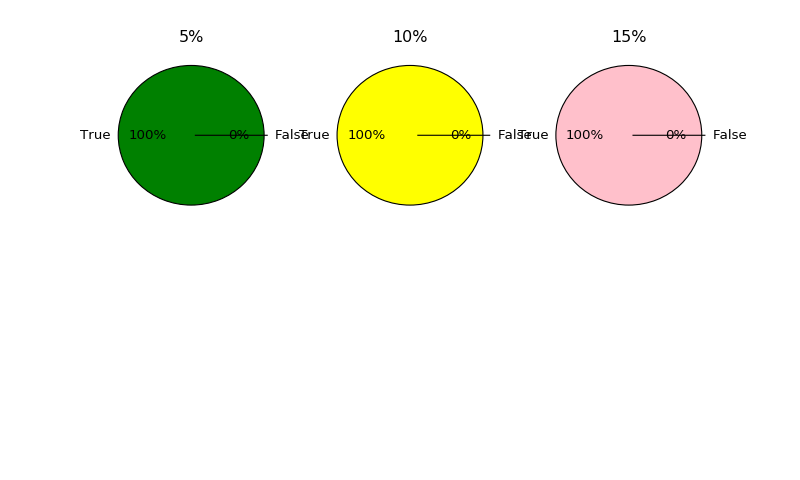

In [40]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import requests
import json, os


# Test API for Document for vector using by Gensim




print('http://' + url + '/api/v1/type/result/nnid/' + nnid + '/ver/'+ ver +'/')
resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nnid + '/ver/'+ ver +'/')
data = json.loads(resp.json())

x= range(len(data.get('labels')))

y = data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame()

y_panda = pd.Series(y)
y_y_panda = pd.Series(y_y)

df['y'] = y_panda.values
df['y_y'] = y_y_panda.values
df['gap'] = df['y']-df['y_y']
df['abs_gap'] = df['gap'].abs()
df['five'] = df['y']*(0.05)
df['ten'] = df['y']*(0.1)
df['fift'] = df['y']*(0.15)
df['five_cnt'] = df.apply(lambda x : 1 if x['five'] > x['abs_gap'] else 0,axis=1 )
df['ten_cnt'] = df.apply(lambda x : 1 if x['ten'] > x['abs_gap'] else 0,axis=1 )
df['fift_cnt'] = df.apply(lambda x : 1 if x['fift'] > x['abs_gap'] else 0,axis=1 )

row_count = len(df.index)
five_sum = df['five_cnt'].sum()
ten_sum =  df['ten_cnt'].sum()
fift_sum = df['fift_cnt'].sum()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(231)
ax1.set_title("5%")

#5%
sizes = [five_sum, row_count-five_sum]
labels = 'True', 'False'
colors = "Green", "Violet"
explode=(0, 0.05)

#ax1.title('5%')
ax1.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')
#ax1.show()

ax2 = fig.add_subplot(232)
ax2.set_title("10%")
#10%
sizes = [ten_sum, row_count-ten_sum ]
labels = 'True', 'False'
colors = "Yellow", "Gray"
explode=(0, 0.1)
#ax2.title('10%')
ax2.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')
#ax2.show()

# #15%
ax3 = fig.add_subplot(233)
ax3.set_title("15%")
sizes = [fift_sum, row_count- fift_sum]
labels = 'True', 'False'
colors = "Pink", "White"
explode=(0, 0.05)
ax3.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')
plt.show()



# STEP13 : Eval Graph 
지정한 label 값에 대한 예측 데이터 값이 나오도록 그래프를 그림

http://1d3f676b65ee:8000/api/v1/type/result/nnid/nn00044/ver/1/


<IPython.core.display.Javascript object>


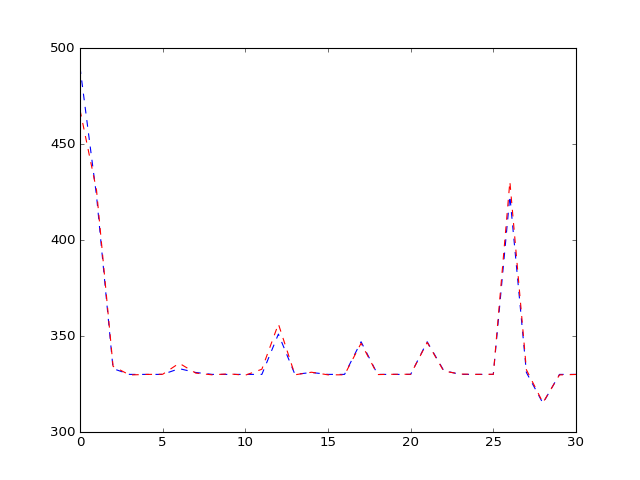

In [39]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import requests
import json, os


# Test API for Document for vector using by Gensim



print('http://' + url + '/api/v1/type/result/nnid/' + nnid + '/ver/'+ ver +'/')
resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nnid + '/ver/'+ ver +'/')
data = json.loads(resp.json())

x= range(len(data.get('labels')))

y = data.get('labels')
y_y = data.get('predicts')

#5%

plt.plot(x, y, 'b--', x, y_y,'r--')
plt.show()

# STEP13 : Predict

파일을 Predict 폴더에 넣고, 경로를 수정한다.


In [88]:
nnid = 'logiccase3levelone100jh4'
ver = '1'
files = {
            'file': open('/hoya_src_root/' +nnid+'/'+ver+'/predict/predict.csv','rb')
        }

resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/wdnn/nnid/'+nnid+'/ver/'+ver+'/',
                     files=files
                     )
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


evaluation result : {'result': '<cluster.common.train_summary_info.TrainSummaryInfo object at 0x7f1ef19b76a0> is not JSON serializable', 'status': '404'}
